In [1]:
import pandas
import pycaret
import numpy as np
import math

import matplotlib.pyplot as plt

from pycaret.regression import load_model
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import MinMaxScaler
#import smogn

In [2]:
filename = "Data_2021_08_13_v1.csv"

In [3]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN
csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
csv = csv[csv['k']>0].reset_index(drop=True)


N1s = np.zeros(len(csv))
N2s = np.zeros(len(csv))
offset = np.zeros(len(csv))


array_len = len(csv)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real

    if csv['Lt'][i] > 100 and csv['Lt'][i]/csv['Lmt'][i] > 0.5:
        csv['Lt'][i] = csv['Lt'][i] * 1e-3
    if csv['Lr'][i] > 100 and csv['Lr'][i]/csv['Lmr'][i] > 0.5:
        csv['Lr'][i] = csv['Lr'][i] * 1e-3
    if csv['Lm'][i] > 100 and csv['Lmt'][i] > 50:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3
    if csv['Lm'][i] > 100:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3

    N1s[i] = csv["N1"][i] **2
    N2s[i] = csv["N2"][i] **2
    offset[i] = abs(csv["offset_tx"][i]-csv["offset_rx"][i])
    

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")

N1s = pandas.DataFrame(N1s,columns=["N1s"])
N2s = pandas.DataFrame(N2s,columns=["N2s"])
csv = pandas.concat([csv,N1s,N2s],axis=1)

R1 = np.zeros(array_len)
R2 = np.zeros(array_len)

for i in range(0, array_len): 
    R1[i] = csv['copperloss_tx'][i]/csv['I1'][i]/csv['I1'][i]
    R2[i] = csv['copperloss_rx'][i]/csv['I2'][i]/csv['I2'][i]

csv = csv.assign(R1 = R1)
csv = csv.assign(R2 = R2)

# N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx

In [18]:
ML_model_Lt = load_model("./model_2021_08_13_v1/ML_model2_v3_2021_08_13_v1_Lt") # Lmt model
ML_model_Lr = load_model("./model_2021_08_13_v1/ML_model2_v3_2021_08_13_v1_Lr") # Lmr model
ML_model_Lm = load_model("./model_2021_08_13_v1/ML_model2_v3_2021_08_13_v1_Lm") # Llt model

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [40]:
param2 = csv.loc[:]
#param2 = csv

Lt = ML_model_Lt.predict(param2)*1e-3
Lr = ML_model_Lr.predict(param2)*1e-3
Lm = ML_model_Lm.predict(param2)*1e-3

k = (Lm/np.sqrt(Lt*Lr))
Llt = (1- k**2) * Lt
Llt = Llt * 1e+6

Lm

array([0.00134413, 0.01130825, 0.00666995, ..., 0.00146373, 0.00147687,
       0.0028612 ])

In [44]:
k

array([0.95597346, 1.08750687, 0.91721401, ..., 0.99335919, 0.97020443,
       0.99131033])

In [42]:
csv['Llt']

0         9.921835
1        21.208488
2        20.579676
3        27.617682
4         5.308163
           ...    
48999    47.798155
49000     6.460351
49001     9.040465
49002    12.290284
49003     6.530288
Name: Llt, Length: 49004, dtype: float64

In [20]:
Lr

array([0.002205  , 0.01657056, 0.01126318, ..., 0.00210301, 0.00196108,
       0.00400309])

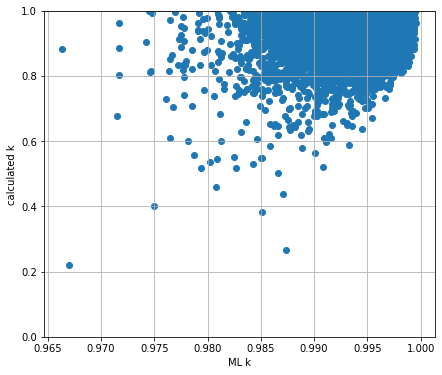

In [46]:
ML_Llt = csv["Llt"]
calculated_Llt = Llt


plt.scatter(csv['k'], k)

plt.xlabel("ML k")
plt.ylabel("calculated k")
plt.grid(True)
plt.ylim([0,1])


#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)